# Desarrollo del EDA y modelo de recomendacion basado en Machine Learning

### 1. Importe de librerias

In [ ]:
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
from sklearn import preprocessing 
import ast
import json 

### 2. Importe de base de datos

In [2]:
df = pd.read_csv("movies_dataset - movies_dataset.csv")

c:\Users\jhoel\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3460: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### 3. Desarrollo del EDA

#### a. Vista exploratoria

In [3]:
# Vista general de la data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44507 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
# Se verifica el tamaña de la base de datos
df.shape

(45466, 24)

In [5]:
# Se eliminan las columnas inecesarias
df.drop(columns=['video', 'imdb_id', 'adult', 'original_title', 'vote_count', 'poster_path', 'homepage'], inplace = True)
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average'],
      dtype='object')

In [6]:
# Se imprimen los primeros 3 registros para hacer un control de la data
df.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5


In [7]:
# Descripcion de variables numericas
df.describe()

,revenue,runtime,vote_average
count,4.546000e+04,45203.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207
std,6.433225e+07,38.407810,1.924216
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000
50%,0.000000e+00,95.000000,6.000000
75%,0.000000e+00,107.000000,6.800000
max,2.787965e+09,1256.000000,10.000000


In [8]:
# Descripcion de las columnas no numericas 
df.describe(include=['O'])

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,spoken_languages,status,tagline,title
count,4494,45466,45466,45466,45455,44507,45461,45463,45463,45379,45460,45379,20411,45460
unique,1698,1226,4069,45436,92,44306,44176,22708,2393,17336,1931,6,20282,42277
top,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",141971,en,No overview found.,0,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella
freq,29,36573,5000,3,32269,133,34,11875,17851,136,22395,45014,7,11


#### b. Transformacion y graficacion 

In [9]:
# Convertimos la columna 'genres' de string a lista de diccionarios
df['genres'] = df['genres'].apply(ast.literal_eval)

# Extraemos el nombre de cada genero y creamos una nueva columna con la lista de nombres de generos
df['genre_names'] = df['genres'].apply(lambda x: [d['name'] for d in x])

# Expandimos la lista de nombres de géneros
generos_expandidos = df['genre_names'].explode()

# Contamos la frecuencia de cada valor en la columna 'genre_names'
conteo_generos = generos_expandidos.value_counts()

# Eliminamos los géneros que solo aparecen una vez
conteo_generos = conteo_generos[conteo_generos > 1]


In [10]:
# Se imprimen los primeros 3 registros para hacer un control de la data
df.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,genre_names
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,"[Animation, Comedy, Family]"
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,"[Adventure, Fantasy, Family]"
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,"[Romance, Comedy]"


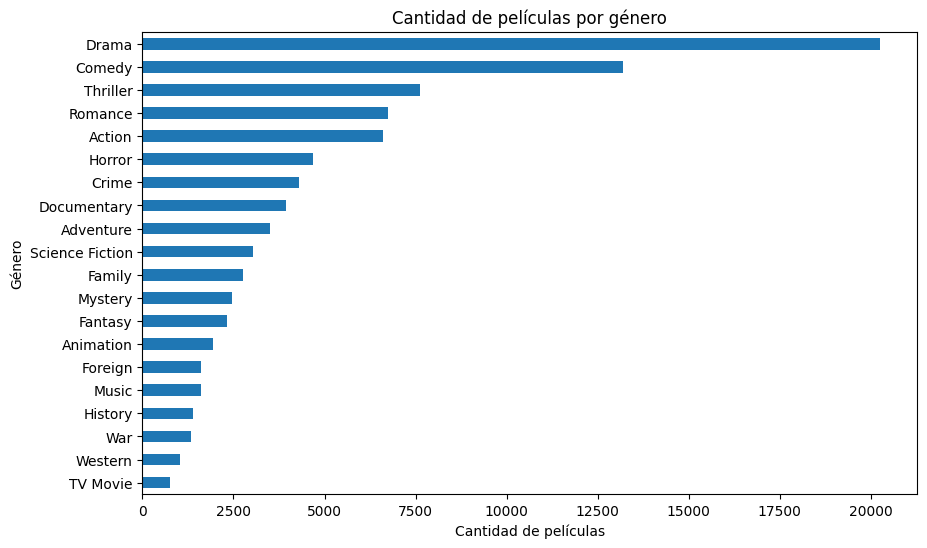

In [11]:
# Grafico para ver la cantidad de peliculas por genero
conteo_generos = conteo_generos.sort_values()  # Ordenamos los géneros por cantidad de películas

# Se grafica la cantidad de peliculas en funcion de su genero
plt.figure(figsize=(10,6)) 
conteo_generos.plot(kind='barh') 
plt.title('Cantidad de películas por género')
plt.xlabel('Cantidad de películas') 
plt.ylabel('Género')  
plt.show() 

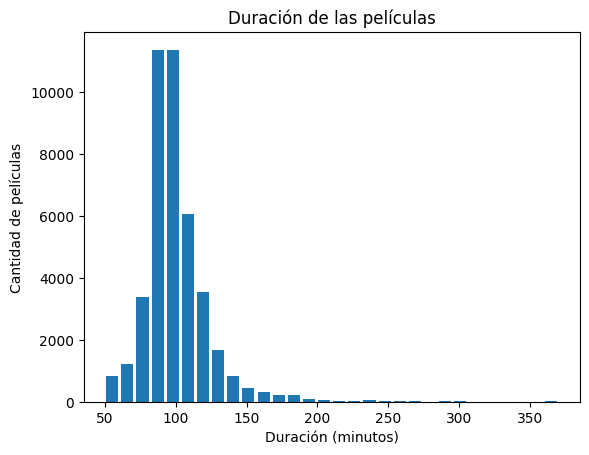

In [12]:
# Duracion de las peliculas
df_filtered = df[(df['runtime'] >= 50) & (df['runtime'] <= 380)]

df_filtered['runtime'].plot(kind='hist', rwidth=0.8, bins=30)

plt.title('Duración de las películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Cantidad de películas')
plt.show()

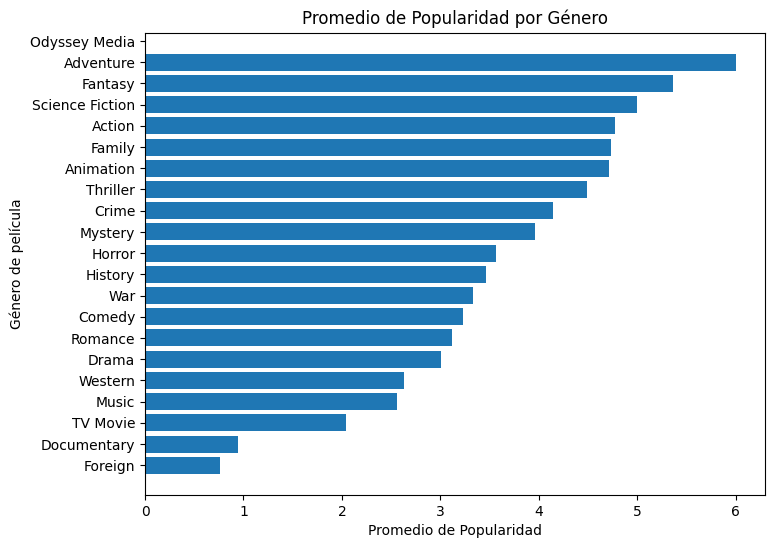

In [13]:
# Se convierte la columna 'popularity' a tipo numérico
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

# Calcular el promedio de popularidad por género
promedio_popularidad = df.explode('genre_names').groupby('genre_names')['popularity'].mean()

# Obtener los géneros y los promedios de popularidad
generos = promedio_popularidad.index.tolist()
promedio = promedio_popularidad.tolist()

# Obtener los índices que ordenan los promedios en orden descendente
indices_orden = np.argsort(promedio)[::1]

# Ordenar los géneros y los promedios utilizando los índices
generos = [generos[i] for i in indices_orden]
promedio = [promedio[i] for i in indices_orden]

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(generos, promedio)
ax.set_ylabel('Género de película')
ax.set_xlabel('Promedio de Popularidad')
ax.set_title('Promedio de Popularidad por Género')

plt.show()

In [14]:
# Función personalizada para normalizar la columna "production_countries"
import re
def normalize_production_countries(value):
    try:
        pattern = r"'name':\s+'(.*?)'"
        matches = re.findall(pattern, value)
        return ', '.join(matches)
    except (TypeError, AttributeError):
        return ''

# Aplicamos la función personalizada a cada elemento de la columna "production_countries"
df['country'] = df['production_countries'].apply(normalize_production_countries)


In [15]:
# Se imprimen los primeros 3 registros para hacer un control de la data
df.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,genre_names,country
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,"[Animation, Comedy, Family]",United States of America
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,"[Adventure, Fantasy, Family]",United States of America
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,"[Romance, Comedy]",United States of America


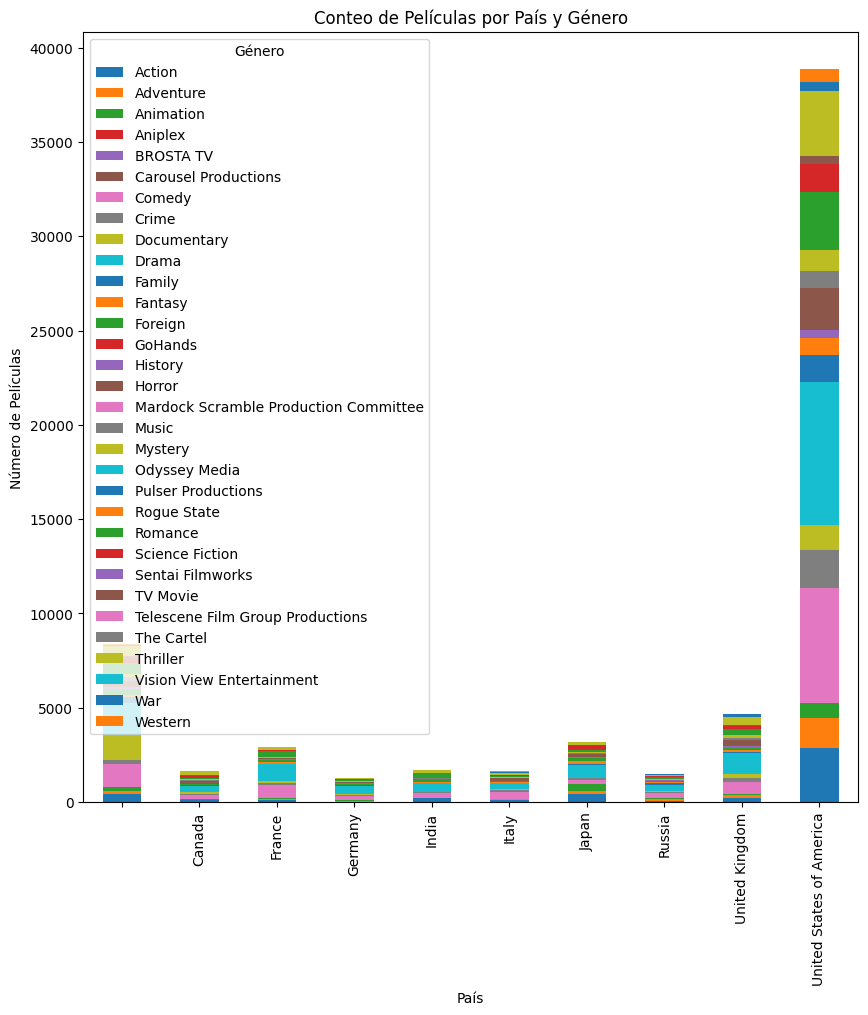

In [16]:
# Crear una columna de conteo para cada película
df['count'] = 1

# Obtener los 20 países con más registros
top_countries = df['country'].value_counts().nlargest(10).index

# Filtrar el DataFrame solo para los países seleccionados
df_filtered = df[df['country'].isin(top_countries)]

# Convertir cada elemento de la lista en una fila separada
df_exploded = df_filtered.explode('genre_names')

# Contar el número de películas por país y género
grouped_data = df_exploded.groupby(['country', 'genre_names']).count()['count'].unstack().fillna(0)

# Crear el gráfico de barras apiladas
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 10))

# Configurar etiquetas y título
ax.set_xlabel('País')
ax.set_ylabel('Número de Películas')
ax.set_title('Conteo de Películas por País y Género')

# Mostrar leyenda
ax.legend(title='Género', loc='upper left')

# Mostrar el gráfico
plt.show()

In [17]:
# Le damos el formato de fecha a todos los valores de la columna y los que no, le asignamos la etiqueta de nulo
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Se asegura que todos los registros tengan el mismo formato de fecha AAAA-MM-DD
df['release_date'] = pd.to_datetime(df['release_date']).dt.strftime('%Y-%m-%d')

# eliminamos los registros con nulos 
df = df.dropna(subset = ['release_date'])

# creamos una nueva columna 'release_year' que va a contener unicamnete el dato de año de la columna 'release_date' 
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year']=df['release_date'].dt.year

In [18]:
# limitamos la base de datos unicamnete a las peliculas posteriores a 1978 para poder generar una mejor lectura de los datos
df = df[df['release_year'] >= 1978]

In [19]:
# Se imprimen los primeros 3 registros para hacer un control de la data
df.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,tagline,title,vote_average,genre_names,country,count,release_year
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,"[Animation, Comedy, Family]",United States of America,1,1995
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,"[Adventure, Fantasy, Family]",United States of America,1,1995
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,"[Romance, Comedy]",United States of America,1,1995


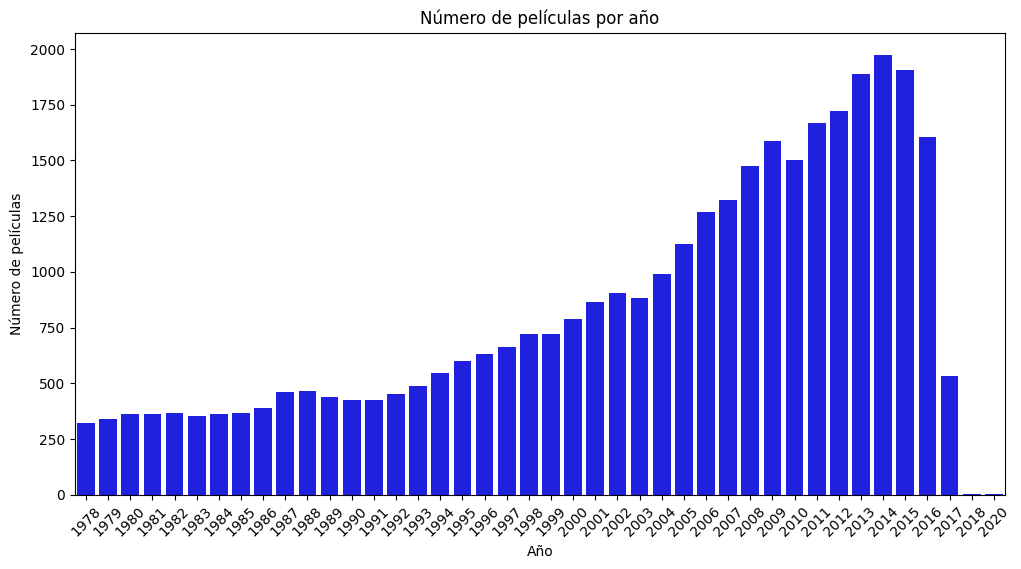

In [20]:
# Se grafica el numero de peliculas en funcion del año 
movies_per_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values, color='b')
plt.xticks(rotation=45)

plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.title('Número de películas por año')

plt.show()

In [21]:
df.describe()

,popularity,revenue,runtime,vote_average,count,release_year
count,34274.000000,3.427400e+04,34078.000000,34274.000000,34274.0,34274.00000
mean,3.340870,1.439280e+07,95.454839,5.632993,1.0,2003.65487
std,6.696074,7.326103e+07,39.121691,1.840253,0.0,10.34470
min,0.000000,0.000000e+00,0.000000,0.000000,1.0,1978.00000
25%,0.459711,0.000000e+00,87.000000,5.000000,1.0,1997.00000
50%,1.363926,0.000000e+00,95.000000,6.000000,1.0,2007.00000
75%,4.683429,0.000000e+00,107.000000,6.800000,1.0,2012.00000
max,547.488298,2.787965e+09,1256.000000,10.000000,1.0,2020.00000


In [22]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'genre_names', 'country', 'count', 'release_year'],
      dtype='object')

#### c. Identificacion de outliers

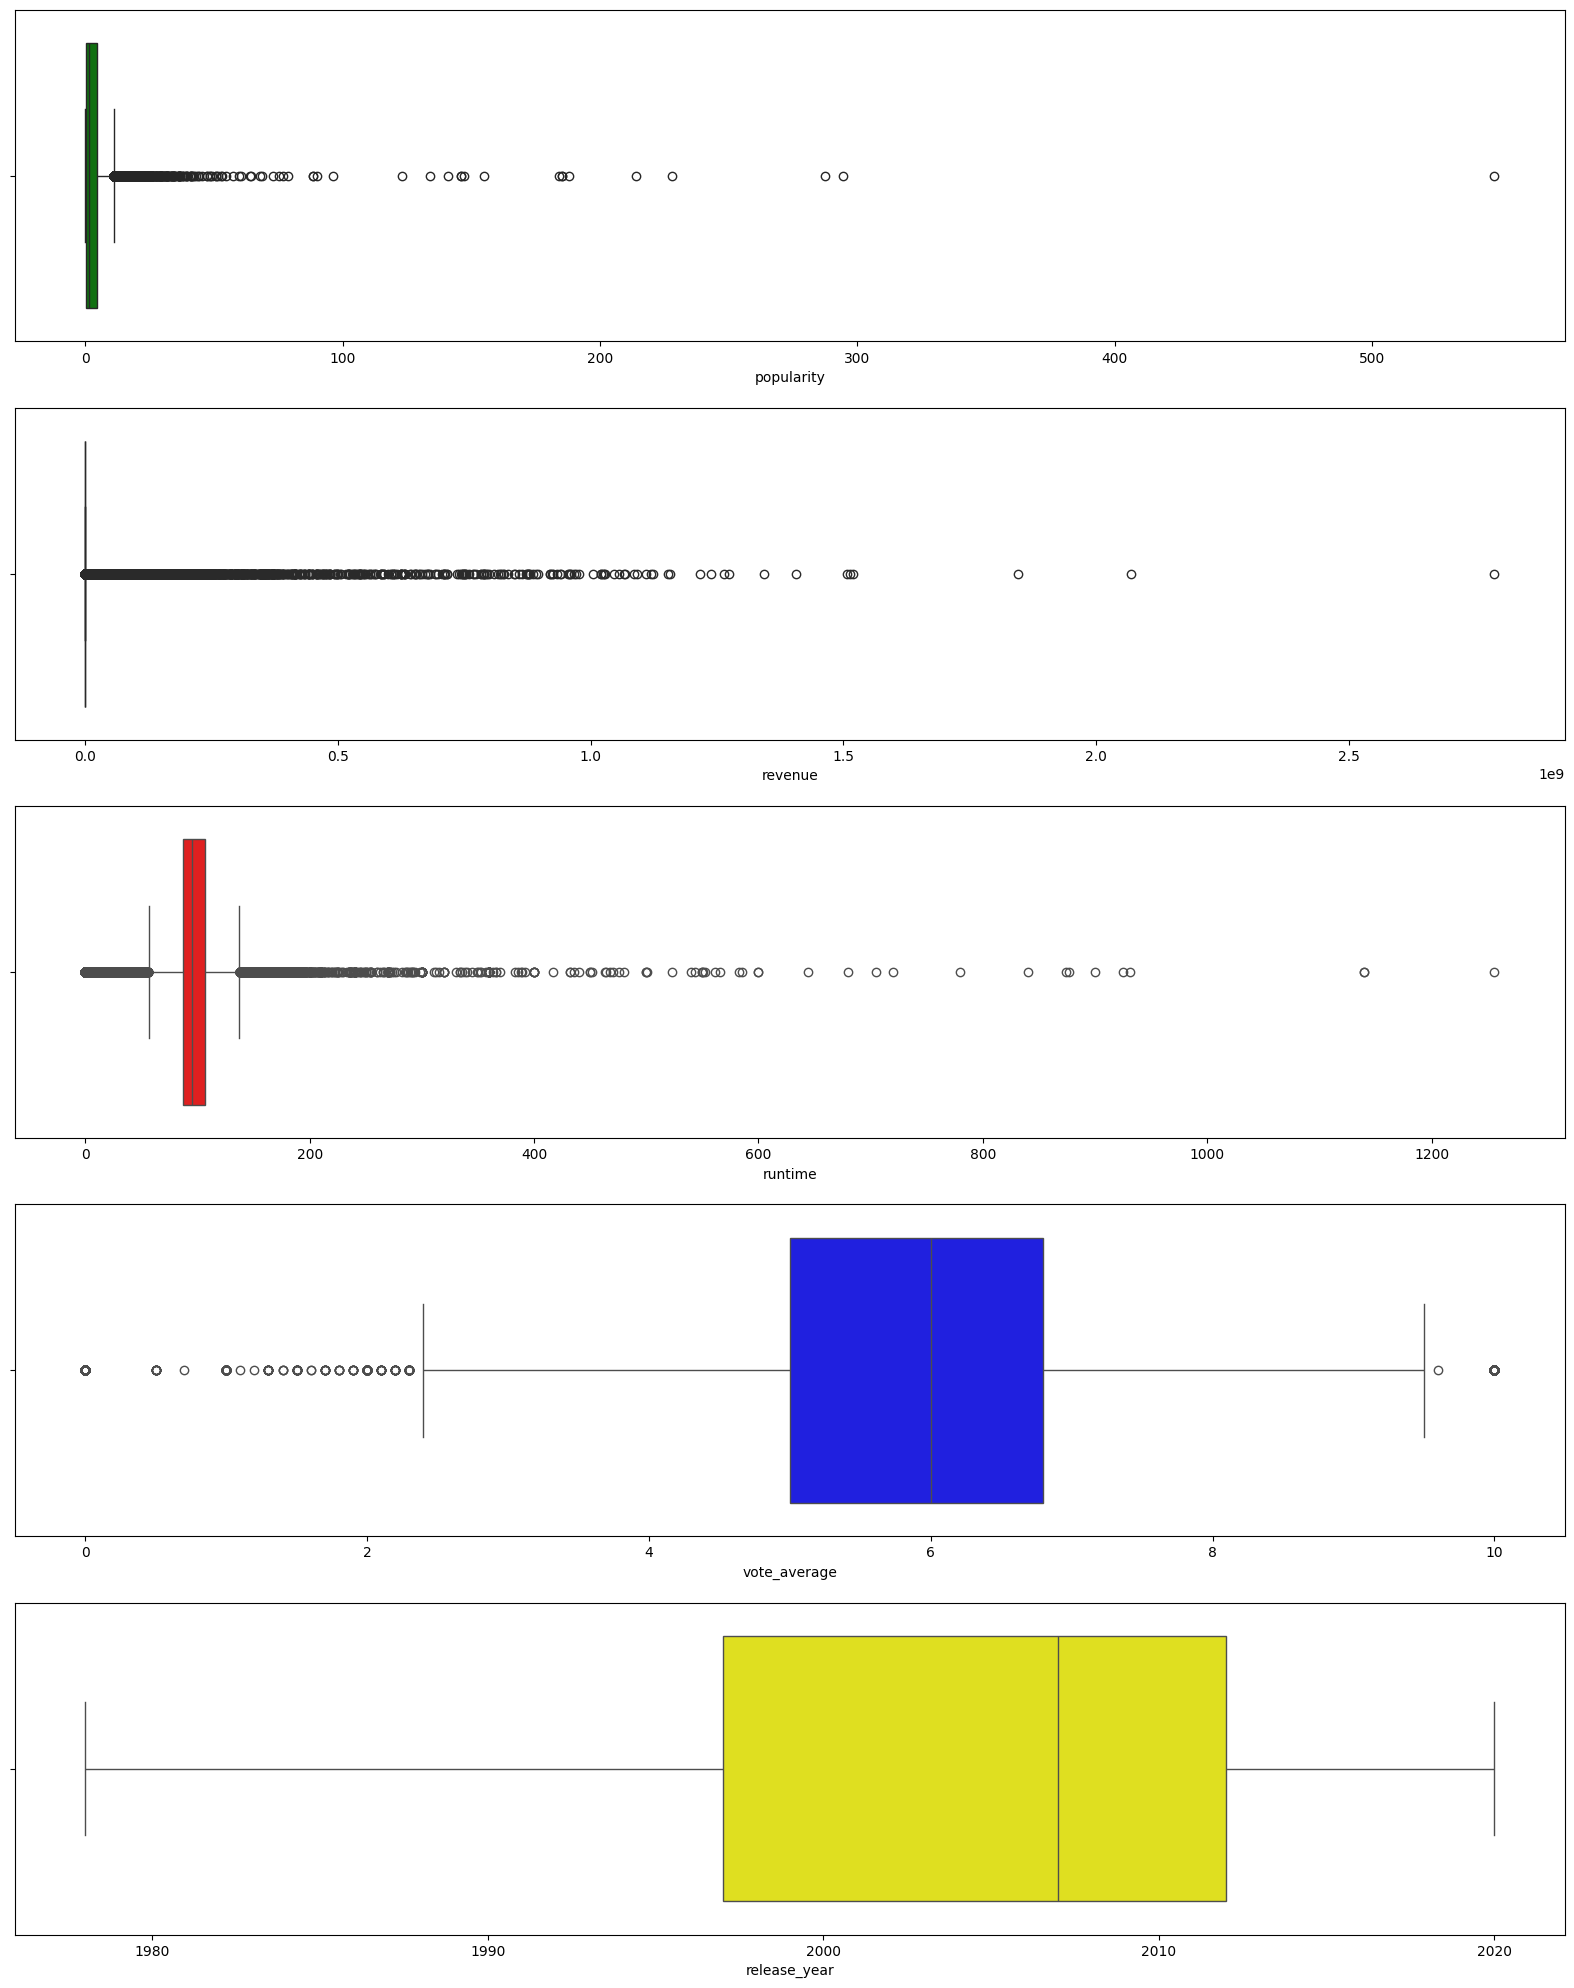

In [23]:
# Se hace graficas de cajas y bigotes para establecer los outliers de las variables numericas
plt.figure(figsize= (20,25))
plt.subplot(5,1,1)
sns.boxplot(x= df.popularity, color='green')

plt.subplot(5,1,2)
sns.boxplot(x= df.revenue, color='darkblue')

plt.subplot(5,1,3)
sns.boxplot(x= df.runtime, color='red')

plt.subplot(5,1,4)
sns.boxplot(x= df.vote_average, color='blue')

plt.subplot(5,1,5)
sns.boxplot(x= df.release_year, color='yellow')

plt.show()

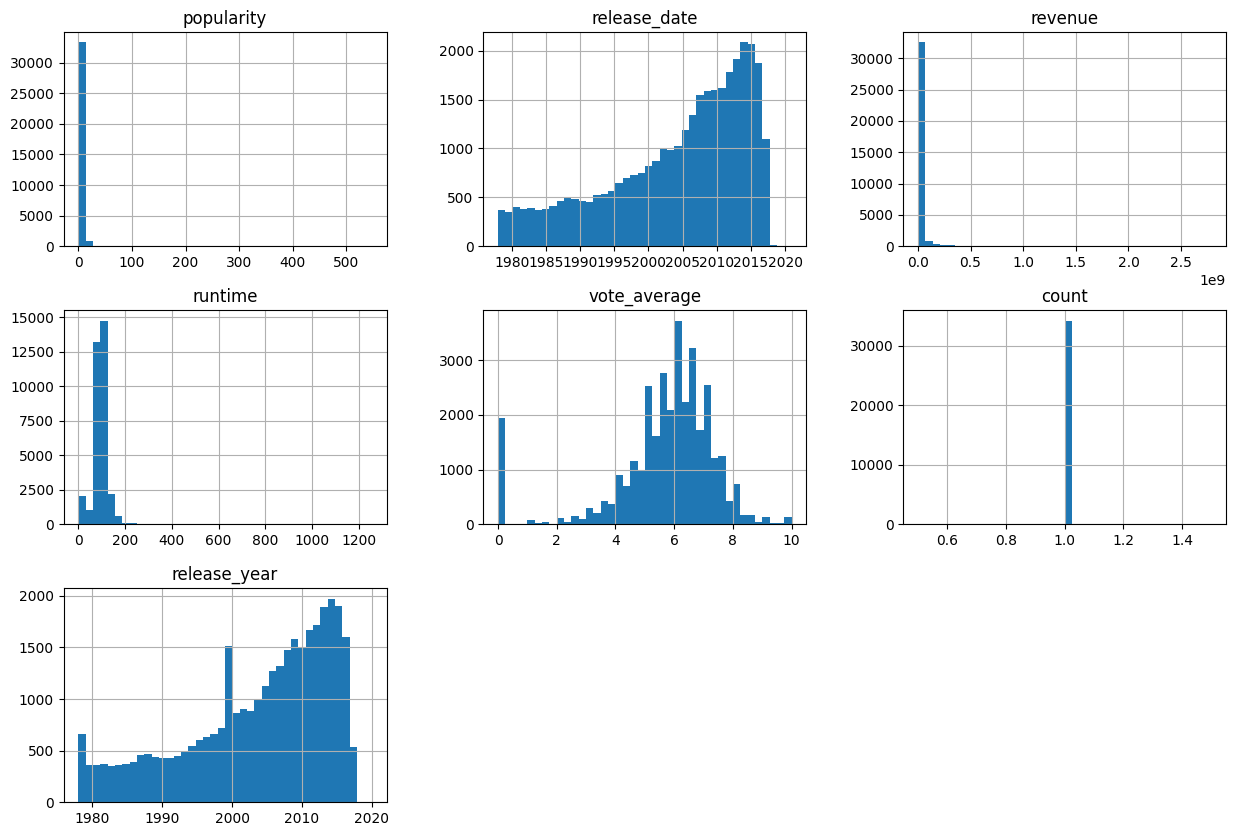

In [24]:
# Distribuciones de las variables numericas
df.hist(bins=40, figsize= (15, 10))
plt.show()

#### d. Matriz de correlacion

<Axes: >

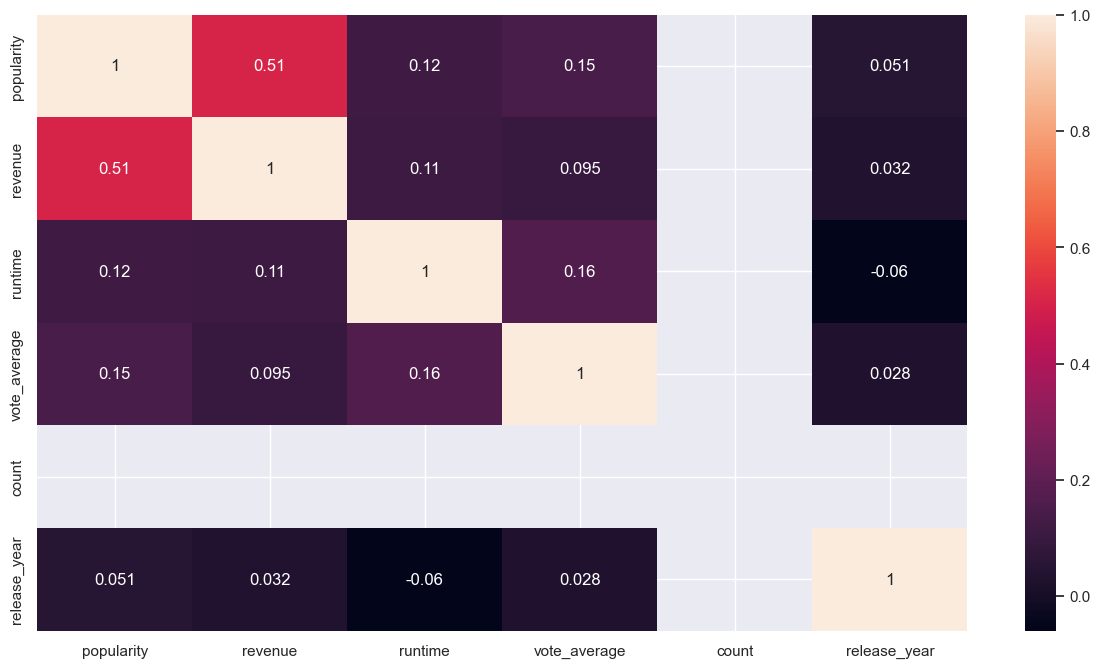

In [25]:
# Se establce una matriz de correlacion para establecer la realcion entre las variables numericas
correlation=df.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(correlation,
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            annot=True)

#### e. Simplificacion de la base de datos y manejo de valores nulos 

In [26]:
# simplificamos la base de datos a partir de un grupo pequeño de columnas categoricas que nos ayudaran al momento de hacer la prediccion 
df=df[['title', 'genres', 'overview', 'belongs_to_collection', 'production_companies', 'vote_average', 'popularity']]

# Controlamos los cambios
df.head(3)

,title,genres,overview,belongs_to_collection,production_companies,vote_average,popularity
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...","{'id': 10194, 'name': 'Toy Story Collection', ...","[{'name': 'Pixar Animation Studios', 'id': 3}]",7.7,21.946943
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,NaN,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",6.9,17.015539
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",6.5,11.712900


In [27]:
# Identificamos los valores nulos por columna
df.isnull().sum()

title                        0
genres                       0
overview                   769
belongs_to_collection    30659
production_companies         0
vote_average                 0
popularity                   0
dtype: int64

In [28]:
# los espacios nulos en la columna 'belongs_to_collection' seran remplazados con espacios en blanco para evitar inconvenientes en la ejecucion del
# codigo
df['belongs_to_collection'].fillna(value="N.A.", inplace=True)

# con respecto a los valores nulos de las columnas 'title' y 'overview' al no ser muchos registros, se decide eliminar los mismos
df.dropna(inplace=True)

# Hacemos control sobre los cambios
df.isnull().sum()

title                    0
genres                   0
overview                 0
belongs_to_collection    0
production_companies     0
vote_average             0
popularity               0
dtype: int64

In [29]:
# se identifican los registros por columna que se encuentran sin registro
# Se identican la cantidad de datos faltantes que no aparecen identificados como nulos

columnas = ['title', 'genres', 'overview', 'belongs_to_collection', 'production_companies',
             'vote_average', 'popularity']
for x in columnas:
    cantidad = (df[x] == '').sum()
    print(f'Numero de datos faltantes, columna {x}: {cantidad}')

Numero de datos faltantes, columna title: 0
Numero de datos faltantes, columna genres: 0
Numero de datos faltantes, columna overview: 0
Numero de datos faltantes, columna belongs_to_collection: 0
Numero de datos faltantes, columna production_companies: 0
Numero de datos faltantes, columna vote_average: 0
Numero de datos faltantes, columna popularity: 0


#### f. Sampleo de la base de datos

In [30]:
# Como la cantidad de resgistros, incluso despues de eliminar los nulos sigue siendo muy grande para ejecutar el entrenamiento del modelo
# se toma la determinacion de hacerla mas pequeña en base a las columnas "vote_average" y "popularity", de manera que primero se seleccionan
# los 20000 registros mejor puentuados en las columana "vote_average" y luego a partir de los 20000 registros se seleccionan los 10000 mejor
# puntuados segun la columna 'popularity'

# convierte las columnas "vote_average" y "popularity" a numéricas
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

# ordena el DataFrame por 'vote_average' en orden descendente
# selecciona los primeros 20,000 registros
df = df.sort_values(by='vote_average', ascending=False).head(20000).reset_index(drop=True)


# ordena los 20,000 registros por 'popularity' en orden descendente
# selecciona los primeros 10,000 registros
df = df.sort_values(by='popularity', ascending=False).head(10000).reset_index(drop=True)

# imprime los primeros 10 registros para verificar
print(df.head(3))

                  title                                             genres  \
0               Minions  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   
1          Wonder Woman  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
2  Beauty and the Beast  [{'id': 10751, 'name': 'Family'}, {'id': 14, '...   

                                            overview  \
0  Minions Stuart, Kevin and Bob are recruited by...   
1  An Amazon princess comes to the world of Man t...   
2  A live-action adaptation of Disney's version o...   

                               belongs_to_collection  \
0  {'id': 86066, 'name': 'Despicable Me Collectio...   
1  {'id': 468552, 'name': 'Wonder Woman Collectio...   
2                                               N.A.   

                                production_companies  vote_average  popularity  
0  [{'name': 'Universal Pictures', 'id': 33}, {'n...           6.4  547.488298  
1  [{'name': 'Dune Entertainment', 'id': 444}, {'...           7.2  294.337

In [31]:
# verificamos el tamaño de la base de datos 
df.shape

(10000, 7)

#### g. Extraccion de datos columnas anidadas

In [32]:
# se identifican las columnas que se encuentran con valores anidados para extraerlos
print(df.iloc[0].genres)
print(df.iloc[0].belongs_to_collection)
print(df.iloc[0].production_companies)

[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id': 12, 'name': 'Adventure'}, {'id': 35, 'name': 'Comedy'}]
{'id': 86066, 'name': 'Despicable Me Collection', 'poster_path': '/xIXhIlZDRmSSfNbpN7kBCm5hg39.jpg', 'backdrop_path': '/15IZl405E664QDVxpFJBl7TtLmw.jpg'}
[{'name': 'Universal Pictures', 'id': 33}, {'name': 'Illumination Entertainment', 'id': 6704}]


In [33]:
# importamos libreria para generar funcion de extraccion de datos
import ast
import re

In [34]:
# Nos aseguramos que la columna 'genres' se encuentre en formato strig
df['genres'] = df['genres'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')
# Función personalizada para normalizar la columna "production_companies"
def normalize_genres(value):
    try:
        pattern = r"'name':\s+'(.*?)'"
        matches = re.findall(pattern, value)
        return [match for match in matches]
    except (TypeError, AttributeError):
        return []

# Aplicamos la función personalizada a cada elemento de la columna "production_companies"
df['genres'] = df['genres'].apply(normalize_genres)

# Imprimimos el DataFrame con la columna de compañías de producción normalizada
#df.head()

In [35]:
# Función personalizada para normalizar la columna "production_companies"
def normalize_production_companies(value):
    try:
        pattern = r"'name':\s+'(.*?)'"
        matches = re.findall(pattern, value)
        return [match for match in matches]
    except (TypeError, AttributeError):
        return []

# Aplicamos la función personalizada a cada elemento de la columna "production_companies"
df['production_companies'] = df['production_companies'].apply(normalize_production_companies)

# Imprimimos el DataFrame con la columna de compañías de producción normalizada
#df.head()

In [36]:
# Se establace la funcion necesaria para la extraccion de los nombre de la coleccion

def extract_collection_name(value):
    try:
        pattern = r"'name': '([^']*)'"
        match = re.search(pattern, value, flags=re.IGNORECASE)
        if match:
            return [match.group(1)]
        else:
            return []
    except (TypeError, AttributeError):
        return []

# Aplicamos la función personalizada a cada elemento de la columna "production_companies"
df['belongs_to_collection'] = df['belongs_to_collection'].apply(extract_collection_name)

# Imprimimos el DataFrame con la columna de compañías de producción normalizada
#df.head()

### 4. Desarrollo del modelo Machine Learning

In [37]:
# Se instala libreria que proporciona herramientas para el manejo del lenguaje natural
#pip install rake_nltk


In [38]:
# Se importan las librerias necesarias para extraer las palabras claves
import rake_nltk
from rake_nltk import Rake 
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')

print(nltk.data.path)


['C:\\Users\\jhoel/nltk_data', 'c:\\Users\\jhoel\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data', 'c:\\Users\\jhoel\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data', 'c:\\Users\\jhoel\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data', 'C:\\Users\\jhoel\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jhoel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jhoel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jhoel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:

# Nos aseguramos que los datos de la columna 'overview' se encuentre en formato string
df['overview'] = df['overview'].astype(str)

# Inicializamos la nueva columna
df['Key_words'] = ""

for index, row in df.iterrows():
    over = row['overview']
    
    # Instanciamos Rake, por defecto usa palabras en inglés para NLTK
    # y descartamos los caracteres de puntuación
    r = Rake()

    # Extraemos las palabras pasando texto
    r.extract_keywords_from_text(over)

    # Obtenemos un diccionario con las palabras clave y sus puntuaciones
    key_words_dict_scores = r.get_word_degrees()
    
    # Asignamos palabras claves a la nueva columna
    df.at[index, 'Key_words'] = list(key_words_dict_scores.keys())

# Eliminamos la columna utilizada
df.drop(columns = ['overview'], inplace = True)

In [40]:
# controlamos los cambios
df.head()

,title,genres,belongs_to_collection,production_companies,vote_average,popularity,Key_words
0,Minions,"[Family, Animation, Adventure, Comedy]",[Despicable Me Collection],"[Universal Pictures, Illumination Entertainment]",6.4,547.488298,"[minions, stuart, kevin, bob, recruited, scarl..."
1,Wonder Woman,"[Action, Adventure, Fantasy]",[Wonder Woman Collection],"[Dune Entertainment, Atlas Entertainment, Warn...",7.2,294.337037,"[amazon, princess, comes, world, man, become, ..."
2,Beauty and the Beast,"[Family, Fantasy, Romance]",[],"[Walt Disney Pictures, Mandeville Films]",6.8,287.253654,"[live, action, adaptation, disney, version, cl..."
3,Baby Driver,"[Action, Crime]",[],"[Big Talk Productions, TriStar Pictures, Media...",7.2,228.032744,"[coerced, working, crime, boss, young, getaway..."
4,Big Hero 6,"[Adventure, Family, Animation, Action, Comedy]",[],"[Walt Disney Pictures, Walt Disney Animation S...",7.8,213.849907,"[special, bond, develops, plus, sized, inflata..."


In [41]:
# Remplazamos los valos " " por "" en cada una de las listas de las columnas desanidadas
df['genres']=df['genres'].apply(lambda x: [i.replace(" ", "") for i in x])
df['belongs_to_collection']=df['belongs_to_collection'].apply(lambda x: [i.replace(" ", "") for i in x])
df['production_companies']=df['production_companies'].apply(lambda x: [i.replace(" ", "") for i in x])

# Nos aseguramos que las columnas esten en formato de lista para poder concatenerlas
# Creamos una columna que reuna los datos de las columnas que usamos para alimentar el modelo
df['tags'] = df['genres'].apply(list) + df['Key_words'].apply(list) + df['belongs_to_collection'].apply(list) + df['production_companies'].apply(list)

# Se dejan unicamente la columna 'tags' en el modelo puesto que es la unica que se va a ausar para la alimentacion del modelo
df=df[['title','tags']]

# unimos todas las cadenas en una sola, con respecto a la columna 'tags'
df['tags']=df['tags'].apply(lambda x:' '.join(x))

# transformamos todos los caracteres a minusculas
df['tags']=df['tags'].apply(lambda x: x.lower())

# hacemos control sobre el mismo
df.head()

,title,tags
0,Minions,family animation adventure comedy minions stua...
1,Wonder Woman,action adventure fantasy amazon princess comes...
2,Beauty and the Beast,family fantasy romance live action adaptation ...
3,Baby Driver,action crime coerced working crime boss young ...
4,Big Hero 6,adventure family animation action comedy speci...


In [42]:
# Se importa libreria que ayuda a reducir las palabras 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# creamos una funcion para la implementacion de la libreria sobre la columna 'tags'
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [43]:
# aplicamos la funcion sobre la columana 'tags'
df['tags'] = df['tags'].apply(stem)

In [44]:
# Descarga de la base de datos transformada para alimentar el modelo 
#df.to_csv('movies_machine_learning.csv', index=True)

#### a. Modelo 1 - Similitud de cosenos

In [45]:
'''
# Importamos la base de datos modificada para poder trabajar sobre ella
df = pd.read_csv('movies_machine_learning.csv', index_col='title')

# importamos la libreria para hacer el modelo
from sklearn.feature_extraction.text import CountVectorizer

# importamos la libreria que nos permitira establcer la similitud de coseno de dos vectores, esto nos servira para comparar la similitud de 
# 2 textos
from sklearn.metrics.pairwise import cosine_similarity

# se parametriza el numero max de caracteres usados, y las palabras comunes que se pueden eliminar del modelo para mejorar su rendimiento
cv = CountVectorizer(max_features= 5000, stop_words= 'english')

# se entrena el modelo en base a la columna 'tags'
# regresa una matriz de de frecuencia de terminos 
# luego 'toarray' convierte la matriz en un array
vectors = cv.fit_transform(df['tags']).toarray()

# Evalua la similitud de coseno entre dos vectores
cosine_sim = cosine_similarity(vectors)

# Se almacenan los indices - titulos 
indices = pd.Series(df.index)
'''

"\n# Importamos la base de datos modificada para poder trabajar sobre ella\ndf = pd.read_csv('movies_machine_learning.csv', index_col='title')\n\n# importamos la libreria para hacer el modelo\nfrom sklearn.feature_extraction.text import CountVectorizer\n\n# importamos la libreria que nos permitira establcer la similitud de coseno de dos vectores, esto nos servira para comparar la similitud de \n# 2 textos\nfrom sklearn.metrics.pairwise import cosine_similarity\n\n# se parametriza el numero max de caracteres usados, y las palabras comunes que se pueden eliminar del modelo para mejorar su rendimiento\ncv = CountVectorizer(max_features= 5000, stop_words= 'english')\n\n# se entrena el modelo en base a la columna 'tags'\n# regresa una matriz de de frecuencia de terminos \n# luego 'toarray' convierte la matriz en un array\nvectors = cv.fit_transform(df['tags']).toarray()\n\n# Evalua la similitud de coseno entre dos vectores\ncosine_sim = cosine_similarity(vectors)\n\n# Se almacenan los indic

In [46]:
df.head()

,title,tags
0,Minions,famili anim adventur comedi minion stuart kevi...
1,Wonder Woman,action adventur fantasi amazon princess come w...
2,Beauty and the Beast,famili fantasi romanc live action adapt disney...
3,Baby Driver,action crime coerc work crime boss young getaw...
4,Big Hero 6,adventur famili anim action comedi special bon...


In [47]:
'''
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(title, cosine_sim = cosine_sim):
    if title not in df.index:
        return 'La pelicula ingresada no se encuentra en la base de datos'
    
    else:
            recommended_movies = []
                
            # gettin the index of the movie that matches the title
            idx = indices[indices == title].index[0]

            # creating a Series with the similarity scores in descending order
            score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

            # getting the indexes of the 5 most similar movies
            top_5_indexes = list(score_series.iloc[1:6].index)
            print(top_5_indexes)
                
            # populating the list with the titles of the best 5 matching movies
            for i in top_5_indexes:
                recommended_movies.append(list(df.index)[i])
            
                    
            return recommended_movies
'''

"\n# function that takes in movie title as input and returns the top 10 recommended movies\ndef recommendations(title, cosine_sim = cosine_sim):\n    if title not in df.index:\n        return 'La pelicula ingresada no se encuentra en la base de datos'\n    \n    else:\n            recommended_movies = []\n                \n            # gettin the index of the movie that matches the title\n            idx = indices[indices == title].index[0]\n\n            # creating a Series with the similarity scores in descending order\n            score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)\n\n            # getting the indexes of the 5 most similar movies\n            top_5_indexes = list(score_series.iloc[1:6].index)\n            print(top_5_indexes)\n                \n            # populating the list with the titles of the best 5 matching movies\n            for i in top_5_indexes:\n                recommended_movies.append(list(df.index)[i])\n            \n         

#### b. Modelo 2 - Vecinos cercanos

##### Desarrollo del modelo vecinos cercanos: Se prueba con un modelo mas eficiente para poder disponibilizar la funcion en la API

In [48]:
from sklearn.feature_extraction.text import CountVectorizer #para convertir las caracteristicas combinadas en una matriz
from sklearn.neighbors import NearestNeighbors # para crear un modelo que pueda encontrar los vecinos mas cercanos en un espacio dado

# Nos aseguramos de que estamos trabajando con los datos exportados del df_highly_rated
df= pd.read_csv('movies_machine_learning.csv')

#  En esta matriz, cada fila representa una película y cada columna 
# representa un termino en las caracteristicas combinadas
cv = CountVectorizer(stop_words='english', max_features=5000)
count_matrix = cv.fit_transform(df['tags'])

# Creamos un modelo para encontrar los vecinos mas cercanos en un espacio de caracterisicaa
nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(count_matrix)

# Creamos un indice de titulos de peliculas y eliminamos los duplicados
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [49]:
def recomendacion(title):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista
    ''' 
    # Verifica si el titulo ingresado se encuentra en el df
    if title not in df['title'].values:
        return 'La pelicula no se encuentra en el conjunto de la base de datos.'
    else:
        # Si el título esta en el df, encuentra su indice
        index = indices[title]

        # Obtiene las puntuaciones de similitud de las 5 peliculas más cercanas
        distances, indices_knn = nn.kneighbors(count_matrix[index], n_neighbors=6)  # indica que queremos encontrar las 6 peliculas más similares, incluyendo la pelicula dada

        # Obtiene los indices de las peliculas
        moviei_ndices = indices_knn[0][1:]  # Se omite el primer indice (la pelicula misma) con [1:]

        # Devuelve las 5 peliculas mas similares
        return df['title'].iloc[moviei_ndices].tolist()

print(recomendacion('Jumanji'))
print(recomendacion('Batman'))
print(recomendacion('Titanic'))
print(recomendacion('Scarface'))
print(recomendacion('Toy Story'))

['Barbie and the Secret Door', 'Halloweentown', 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe', 'The Spiderwick Chronicles', 'Spirited Away']
['The Dark Knight Rises', 'Batman Beyond: Return of the Joker', 'Batman Unlimited: Monster Mayhem', 'Batman vs Dracula', 'LEGO DC Comics Super Heroes: Justice League - Gotham City Breakout']
['The Switch', 'Kuch Kuch Hota Hai', 'A Quiet Passion', 'Under the Same Moon', 'A Rumor of Angels']
['Clear and Present Danger', "The Devil's Double", 'Kiss of the Dragon', 'Desperado', 'Shottas']
['Toy Story 2', 'Hawaiian Vacation', 'Toy Story 3', 'Partysaurus Rex', 'An Extremely Goofy Movie']


#### c. Pruebas del modelo - Similitud de cosenos

In [50]:
recommendations('Jumanji')

NameError: name 'recommendations' is not defined

In [ ]:
recommendations('Batman')

'La pelicula ingresada no se encuentra en la base de datos'

In [ ]:
recommendations('Titanic')

'La pelicula ingresada no se encuentra en la base de datos'

In [ ]:
recommendations('Scarface')

'La pelicula ingresada no se encuentra en la base de datos'

In [ ]:
recommendations('Toy Story')

'La pelicula ingresada no se encuentra en la base de datos'

#### d. Pruebas del modelo - Vecinos cercanos

In [ ]:
recomendacion('Jumanji')

['Barbie and the Secret Door',
 'Halloweentown',
 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe',
 'The Spiderwick Chronicles',
 'Spirited Away']

In [ ]:
recomendacion('Batman')

['The Dark Knight Rises',
 'Batman Beyond: Return of the Joker',
 'Batman Unlimited: Monster Mayhem',
 'Batman vs Dracula',
 'LEGO DC Comics Super Heroes: Justice League - Gotham City Breakout']

In [ ]:
recomendacion('Titanic')

['The Switch',
 'Kuch Kuch Hota Hai',
 'A Quiet Passion',
 'Under the Same Moon',
 'A Rumor of Angels']

In [ ]:
recomendacion('Scarface')

['Clear and Present Danger',
 "The Devil's Double",
 'Kiss of the Dragon',
 'Desperado',
 'Shottas']

In [ ]:
recomendacion('Toy Story')

['Toy Story 2',
 'Hawaiian Vacation',
 'Toy Story 3',
 'Partysaurus Rex',
 'An Extremely Goofy Movie']

In [ ]:
recomendacion('An Extremely Goofy Movie')

['Together', 'Annie', 'Rio', 'Vai Que Dá Certo', 'Reality']